 # 1.Создание генератора картинок (основа наследованя от Dataset):

## Обращение к картинкам с клетками крови из папки original 

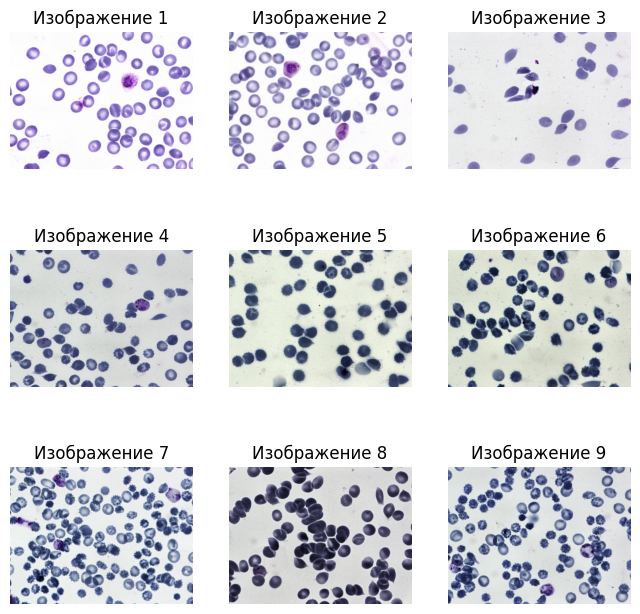

In [7]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as v2
import matplotlib.pyplot as plt
import os
from PIL import Image  


class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Директория со всеми изображениями.
            transform (callable, optional): Необязательное преобразование, применяемое
                к образцу.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, filename) for filename in os.listdir(root_dir) if filename.endswith(".png")]  # Загружаем только PNG
        self.image_paths = sorted(self.image_paths)  # Сортируем пути для поддержания согласованного порядка

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path) # Используем PIL для открытия изображения
        if self.transform:
            image = self.transform(image)
        # Поскольку у нас нет меток, давайте вернем фиктивную метку (например, 0)
        # Вам нужно будет изменить это, если у вас есть способ получить метки.
        return image, 0  # возвращаем изображение и фиктивную метку


# Определение путь к директории с изображениями
image_dir = "BCCD Dataset with mask/train/original"  # Замените фактическим путем
# Проверка, что директория существует.
if not os.path.exists(image_dir):
    print(f"Ошибка: Директория '{image_dir}' не найдена. Пожалуйста, проверьте путь.")
    exit()


# Определяем преобразование, которое нужно применить к изображениям.  Ключевой момент - преобразование в тензор.
transform = v2.Compose([
    v2.ToTensor()
])

# Создаем пользовательский набор данных
dataset = CustomDataset(root_dir=image_dir, transform=transform)

# Отображаем первые 9 изображений
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    if i <= len(dataset):
        img, label = dataset[i-1]  # Получаем i-е изображение (индексация с 0)
        figure.add_subplot(rows, cols, i)
        # Замените подходящими заголовками, если у вас есть метки
        plt.title(f"Изображение {i}")  # или labels_map[label], если бы у вас были метки
        plt.axis("off")
        plt.imshow(img.squeeze().permute(1, 2, 0), cmap="gray") # Добавлено .permute(1, 2, 0) для исправления порядка цветовых каналов для отображения
    else:
        print(f"Предупреждение: Доступно только {len(dataset)} изображений. Останавливаемся на изображении {i-1}.")
        break # Останавливаемся, если вы попытаетесь получить доступ за пределы количества доступных изображений

plt.show()

# Обращение к картинкам с фоном из папки mask

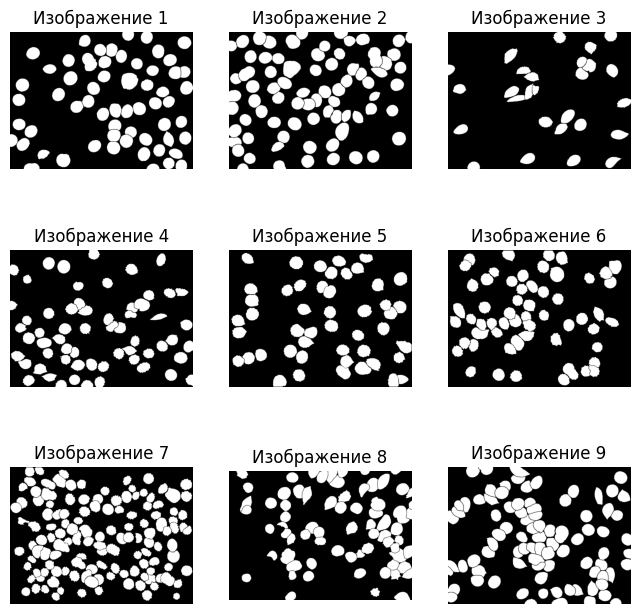

In [6]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Директория со всеми изображениями.
            transform (callable, optional): Необязательное преобразование, применяемое
                к образцу.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, filename) for filename in os.listdir(root_dir) if filename.endswith(".png")]  # Загружаем только PNG
        self.image_paths = sorted(self.image_paths)  # Сортируем пути для поддержания согласованного порядка

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path) # Используем PIL для открытия изображения
        if self.transform:
            image = self.transform(image)
        # Поскольку у нас нет меток, давайте вернем фиктивную метку (например, 0)
        # Вам нужно будет изменить это, если у вас есть способ получить метки.
        return image, 0  # возвращаем изображение и фиктивную метку


# Определение путь к директории с изображениями
image_dir = "BCCD Dataset with mask/train/mask"  # Замените фактическим путем
# Проверка, что директория существует.
if not os.path.exists(image_dir):
    print(f"Ошибка: Директория '{image_dir}' не найдена. Пожалуйста, проверьте путь.")
    exit()


# Определяем преобразование, которое нужно применить к изображениям.  Ключевой момент - преобразование в тензор.
transform = v2.Compose([
    v2.ToTensor()
])

# Создаем пользовательский набор данных
dataset = CustomDataset(root_dir=image_dir, transform=transform)

# Отображаем первые 9 изображений
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    if i <= len(dataset):
        img, label = dataset[i-1]  # Получаем i-е изображение (индексация с 0)
        figure.add_subplot(rows, cols, i)
        # Замените подходящими заголовками, если у вас есть метки
        plt.title(f"Изображение {i}")  # или labels_map[label], если бы у вас были метки
        plt.axis("off")
        plt.imshow(img.squeeze().permute(1, 2, 0), cmap="gray") # Добавлено .permute(1, 2, 0) для исправления порядка цветовых каналов для отображения
    else:
        print(f"Предупреждение: Доступно только {len(dataset)} изображений. Останавливаемся на изображении {i-1}.")
        break # Останавливаемся, если вы попытаетесь получить доступ за пределы количества доступных изображений

plt.show()

# Blending-задача (объединения изображения фона и изображений объектов)

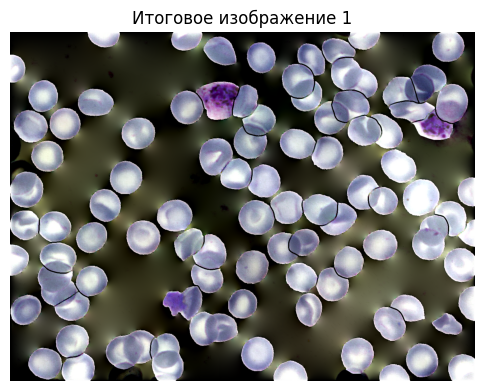

True

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображений
im = cv2.imread("BCCD Dataset with mask/train/mask/e3a4b3e7-9500-4b6c-a402-b6d3f45e714b.png")
obj = cv2.imread("BCCD Dataset with mask/train/original/e3a4b3e7-9500-4b6c-a402-b6d3f45e714b.png")


# # Убедитесь, что изображения успешно загружены
# if im is None:
#     print("Ошибка: Не удалось загрузить изображение 'im'")
#     exit()
# if obj is None:
#     print("Ошибка: Не удалось загрузить изображение 'obj'")
#     exit()

# Маска должна быть одноканальной и иметь ту же высоту и ширину, что и obj
mask = 255 * np.ones(obj.shape[:2], obj.dtype)

height, width, channels = im.shape
center = (width // 2, height // 2)

# Бесшовное клонирование
mixed_clone = cv2.seamlessClone(obj, im, mask, center, cv2.MIXED_CLONE)

# Преобразование цветовой схемы BGR в RGB для matplotlib
mixed_clone_rgb = cv2.cvtColor(mixed_clone, cv2.COLOR_BGR2RGB)
# ---------------------------------------------------------------------
mixed_clone_2 = cv2.seamlessClone(obj, im, mask, center, cv2.MIXED_CLONE)

# Преобразование цветовой схемы BGR в RGB для matplotlib
mixed_clone_rgb_2 = cv2.cvtColor(mixed_clone_2, cv2.COLOR_BGR2RGB)


# Вывод изображения с помощью matplotlib
plt.figure(figsize=(6, 6))  # Опционально: установка размера фигуры
plt.imshow(mixed_clone_rgb)
plt.title("Итоговое изображение 1")  # Опционально: заголовок изображения
plt.axis('off')  # Опционально: отключение осей координат
plt.show()

# Сохранение изображения (опционально)
cv2.imwrite("BCCD Dataset with mask/opencv-mixed-clone-example.jpg", mixed_clone)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


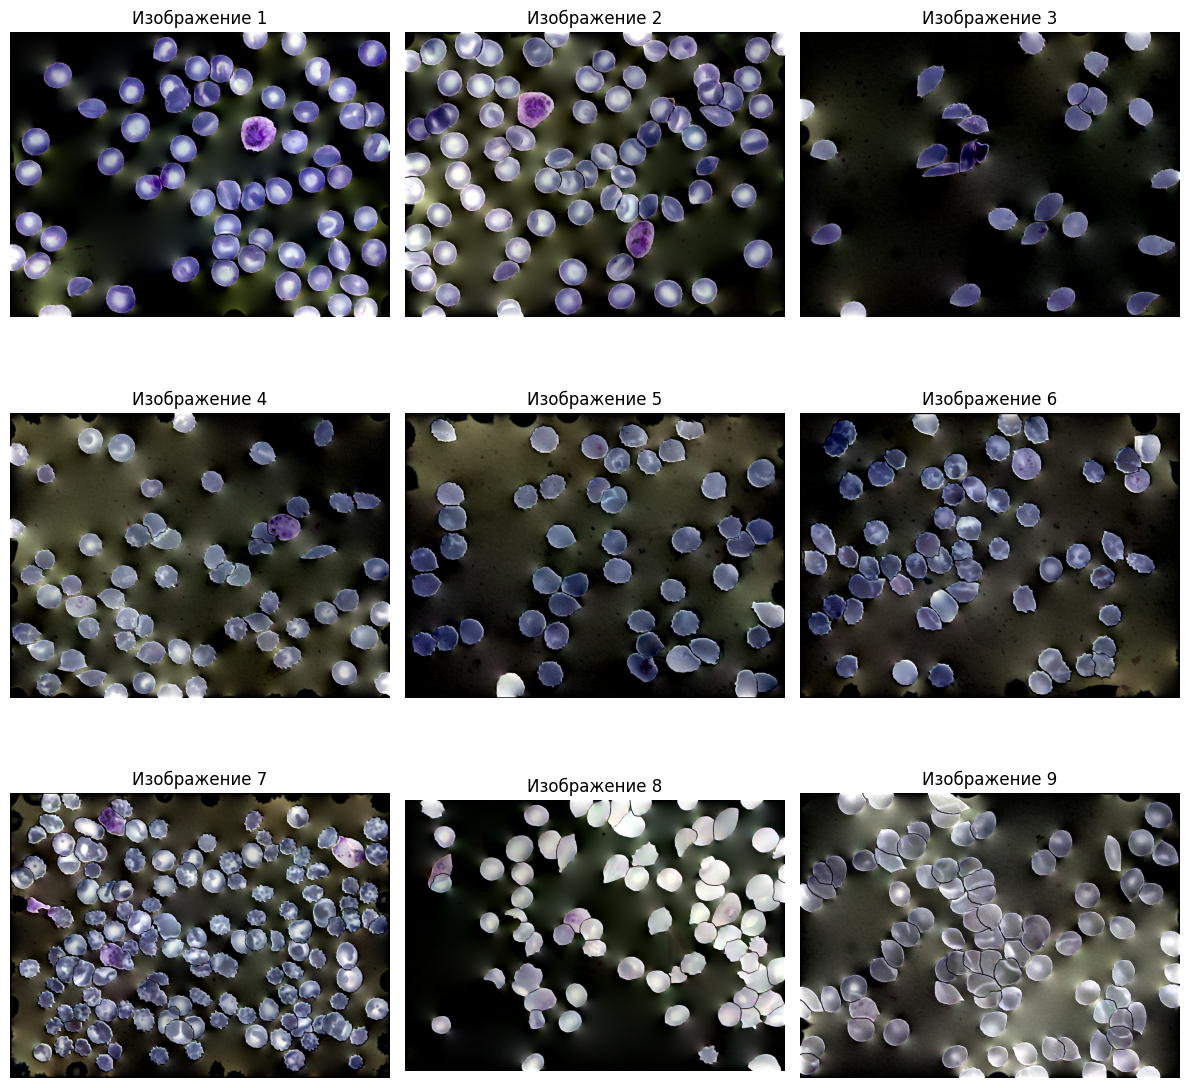

libpng warning: iCCP: known incorrect sRGB profile


Изображение сохранено в: result_images/mixed_clone_1.jpg


libpng warning: iCCP: known incorrect sRGB profile


Изображение сохранено в: result_images/mixed_clone_2.jpg


libpng warning: iCCP: known incorrect sRGB profile


Изображение сохранено в: result_images/mixed_clone_3.jpg


libpng warning: iCCP: known incorrect sRGB profile


Изображение сохранено в: result_images/mixed_clone_4.jpg


libpng warning: iCCP: known incorrect sRGB profile


Изображение сохранено в: result_images/mixed_clone_5.jpg


libpng warning: iCCP: known incorrect sRGB profile


Изображение сохранено в: result_images/mixed_clone_6.jpg


libpng warning: iCCP: known incorrect sRGB profile


Изображение сохранено в: result_images/mixed_clone_7.jpg
Изображение сохранено в: result_images/mixed_clone_8.jpg
Изображение сохранено в: result_images/mixed_clone_9.jpg


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Пути к папкам с изображениями
mask_dir = "BCCD Dataset with mask/train/mask"
original_dir = "BCCD Dataset with mask/train/original"

# Получаем список файлов в папках (предполагаем, что имена файлов соответствуют)
mask_files = sorted(os.listdir(mask_dir))
original_files = sorted(os.listdir(original_dir))

# Определяем количество изображений для обработки (первые 9)
num_images = min(9, len(mask_files), len(original_files))  # Убедимся, что не выходим за границы доступных данных

# Создаем фигуру и оси для отображения изображений
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 сетка для 9 изображений
axes = axes.ravel()  # Преобразуем массив осей в одномерный

for i in range(num_images):
    # Формируем полные пути к изображениям
    mask_path = os.path.join(mask_dir, mask_files[i])
    original_path = os.path.join(original_dir, original_files[i])

    # Загрузка изображений
    im = cv2.imread(mask_path)
    obj = cv2.imread(original_path)

    # Проверка успешности загрузки
    # if im is None:
    #     print(f"Ошибка: Не удалось загрузить изображение маски: {mask_path}")
    #     continue  # Переходим к следующей итерации
    # if obj is None:
    #     print(f"Ошибка: Не удалось загрузить оригинальное изображение: {original_path}")
    #     continue  # Переходим к следующей итерации


    # Маска должна быть одноканальной и иметь ту же высоту и ширину, что и obj
    mask = 255 * np.ones(obj.shape[:2], obj.dtype)

    height, width, channels = im.shape
    center = (width // 2, height // 2)

    # Бесшовное клонирование
    mixed_clone = cv2.seamlessClone(obj, im, mask, center, cv2.MIXED_CLONE)

    # Преобразование цветовой схемы BGR в RGB для matplotlib
    mixed_clone_rgb = cv2.cvtColor(mixed_clone, cv2.COLOR_BGR2RGB)

    # Отображение изображения на соответствующей оси
    axes[i].imshow(mixed_clone_rgb)
    axes[i].set_title(f"Изображение {i+1}")
    axes[i].axis('off')

plt.tight_layout()  # Автоматическая корректировка расположения графиков для избежания перекрытий
plt.show()

# Опционально: Сохранение всех обработанных изображений в отдельные файлы
output_dir = "result_images"  # Папка для сохранения изображений
os.makedirs(output_dir, exist_ok=True)  # Создаем папку, если ее нет

for i in range(num_images):
    mask_path = os.path.join(mask_dir, mask_files[i])
    original_path = os.path.join(original_dir, original_files[i])

    im = cv2.imread(mask_path)
    obj = cv2.imread(original_path)

    if im is None or obj is None:
        continue

    mask = 255 * np.ones(obj.shape[:2], obj.dtype)

    height, width, channels = im.shape
    center = (width // 2, height // 2)

    mixed_clone = cv2.seamlessClone(obj, im, mask, center, cv2.MIXED_CLONE)

    output_path = os.path.join(output_dir, f"mixed_clone_{i+1}.jpg")
    cv2.imwrite(output_path, mixed_clone)
    print(f"Изображение сохранено в: {output_path}")